In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
import scipy as sp
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm
import threading
from threading import Thread
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
#Check numerically the Fourier pair Laplace <-> Lorentzian

N=1024 #grid size
Dt=0.1 #grid step in real space
t=Dt*np.arange(-N/2,(N/2),1) #grid in real space
T=N*Dt #upper truncation limit in real space
Dnu= 1/T #Nyquist relation: Dt*Dnu = 1/N
nu=Dnu*np.arange(-N/2,(N/2),1)
Nu=N*Dnu # =1/Dx

a=1
fa=(a/2)*np.exp(-a*np.abs(t)) #Laplace (or double exponential)
Fa=(a**2)/((a**2)+(2*np.pi*nu)**2) #Lorentzian (or Cauchy)

Fn= np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fa)))*T
fn= sp.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fa)))/T
Fn1= np.fft.fftshift(np.fft.fft(np.fft.ifftshift(fa)))*Dt
fn1= np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(Fa)))/Dt

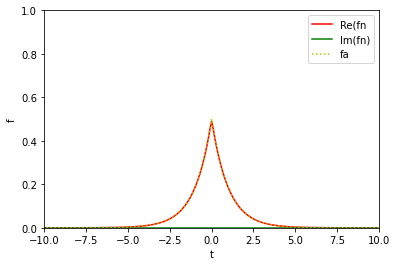

In [3]:
plt.figure(1)
plt.plot(t,np.real(fn),'r')
plt.plot(t,abs(np.imag(fn)),'g')
plt.plot(t,fa,'y:')
plt.axis([-10,10,0,1])
plt.xlabel('t')
plt.ylabel('f')
plt.legend(['Re(fn','Im(fn)','fa'])
plt.show()

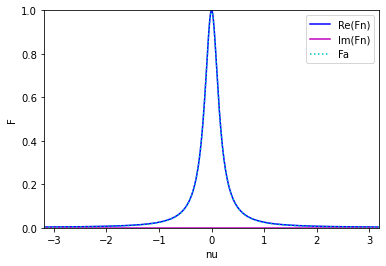

In [4]:
plt.figure(2)
plt.plot(nu,np.real(Fn),'b')
plt.plot(nu,abs(np.imag(Fn)),'m')
plt.plot(nu,Fa,'c:')
plt.axis([-10/np.pi,10/np.pi,0,1])
plt.xlabel('nu')
plt.ylabel('F')
plt.legend(['Re(Fn)','Im(Fn)','Fa'])
plt.show()

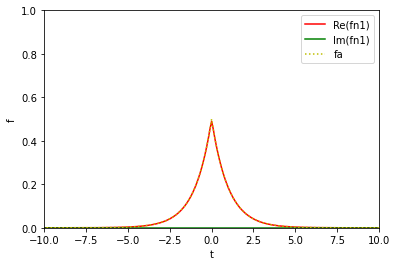

In [5]:
plt.figure(3)
plt.plot(t,np.real(fn1),'r')
plt.plot(t,abs(np.imag(fn1)),'g')
plt.plot(t,fa,'y:')
plt.axis([-10,10,0,1])
plt.xlabel('t')
plt.ylabel('f')
plt.legend(['Re(fn1)','Im(fn1)','fa'])
plt.show()

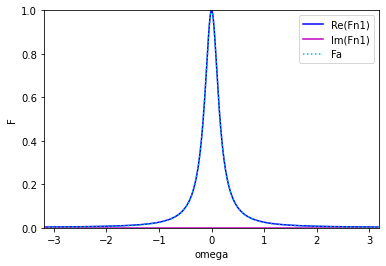

In [6]:
plt.figure(4)
plt.plot(nu,np.real(Fn1),'b')
plt.plot(nu,abs(np.imag(Fn1)),'m')
plt.plot(nu,Fa,'c:')
plt.axis([-10/np.pi,10/np.pi,0,1])
plt.xlabel('omega')
plt.ylabel('F')
plt.legend(['Re(Fn1)','Im(Fn1)','Fa'])
plt.show()